## Read a dataframe 

In [1]:
import pandas as pd

df = pd.read_csv('melbourne_housing.csv')

## Import the OutlierDetect class from the driver module of the anomalydetectorv2 package

In [2]:
from anomalydetectorv2.driver import OutlierDetect

### Create an instance of the OutlierDetect object by passing the df as an argument

In [3]:
obj = OutlierDetect(df)

### Documentation of all the methods can be checked using the __doc__ attribute

In [4]:
obj.__doc__

'The class which is used to drive the whole process.\n    Attributes: df,enc_df,enc_mapping,res_df,isofor,features_map,res_scores,threshold_anomaly_index,advanced_res_df,iforest_score_outlier_threshold,shap_values\n    Methods: encode_df(),online_fit(),online_explain(),online_advanced_explain().\n    '

In [5]:
obj.online_fit.__doc__

"\n        Returns a df res_df which has all the columns of the ORIGINAL dataframe plus two additional columns - 'is_anomaly' and 'anomaly_score'.\n        is_anomaly is a bool value and the anomaly_score is the value of the score_samples given to the rows according to the isolation forest algorithm.\n        _______________________\n        Parameters: config(default = config); fr_anomalous(Default = None, in this case, the threshold is chosen as given in the config module) -\n        Specifies the fraction of the total anomalies to be extracted. For ex, if fr_anomalous = 0.01, the top 1% of all the anomalies\n        identified by the iforest(sorted by score_samples) are extracted and the corresponding indices are stored in threshold_anomaly_index. Only these\n        top 1% anomalies are explained by the methods online_explain() and online_advanced_explain(). The iforest_score_outlier_threshold\n        attribute is selected based on this parameter.\n        "

In [6]:
obj.encode_df.__doc__

"\n        Encodes the original dataframe. The original dataframe may have missing values and/or categorical values. The missing values are filled and the\n        categorical variables are encoded. If there is a timestamp column, that is unloaded into timestamp columns.\n        Parameters: nan_anomaly - Whether nan values should be treated as potential anomalies.\n        normalize - After encoding the dataframe, this parameter specifies whether the dataframe should be normalized. Default value = False.\n        missing_threshold - If nan_anomaly == True, what threshold should be chosen for treating missing values as anomalies. For ex. if missing_threshold = 0.2,\n        the nan values IN all columns which have LESS THAN 20% NANS are treated as anomalies and hence they are filled with extreme values(sys.maxsize).\n\n        If a column has more that 20% nan's, then the missing values of that column are NOT filled with extreme values. If the column is numeric, the most appropriate va

##### Encode the dataframe. The encode_df() method is used for this. Refer to the documentation for what the parameters do. Note: Suppose there are two columns A,B with mean values of 1 and 2000 respectively. And suppose there is a value - 13 in A and 2012 in B. Though both these values deviate by the same amount (12), the value of 13 is more likely to be an anomaly. That is why an option to normalize is provided. If normalize == True, sklearn's StandardScalar is used to normalize the encoded dataframe.

## Note: Default value of corr_encode is False. So, do not specify corr_encode if you want serial encoding.

In [7]:
obj.encode_df(nan_anomaly = True,missing_threshold = 0.2,corr_encode = True,normalize = True)

Treating nan values as potential anomalies depending on the threshold =  0.2
Encoding column  Rooms
Filling nans with extreme values
Encoding column  Price
Getting best replacement for nan values
Encoding column  Distance
Filling nans with extreme values
Encoding column  Postcode
Filling nans with extreme values
Encoding column  Bedroom2
Getting best replacement for nan values
Encoding column  Bathroom
Getting best replacement for nan values
Encoding column  Car
Getting best replacement for nan values
Encoding column  Landsize
Getting best replacement for nan values
Encoding column  BuildingArea
Getting best replacement for nan values
Encoding column  YearBuilt
Getting best replacement for nan values
Encoding column  Lattitude
Getting best replacement for nan values
Encoding column  Longtitude
Getting best replacement for nan values
Encoding column  Propertycount
Filling nans with extreme values
Encoding column  Suburb
Getting best mapping for column  Suburb
Encoding column  Address
Ge

#### After the encoding is complete, the enc_df attribute of obj can be used to access the encoded dataframe. The values you see below are so because in this demo, I set normalize to True.

In [8]:
obj.enc_df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Longtitude,Propertycount,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,-1.062988,-0.246224,-0.005356,-0.005356,-1.240788,-1.092836,-0.902356,-0.160283,-0.037915,0.083914,...,-0.070222,-0.009278,-0.544517,1.451698,-0.637822,-0.004908,1.345674,-0.959804,-0.009278,-0.009278
1,-1.062988,0.820227,-0.005356,-0.005356,-1.240788,-1.092836,-0.902356,-0.132785,-0.037915,0.083914,...,-0.045591,-0.009278,-0.544517,0.031382,-0.637822,-0.477498,-1.164359,1.400285,-0.009278,-0.009278
2,-1.062988,0.042242,-0.005356,-0.005356,-1.240788,-1.092836,-2.034916,-0.149429,-0.263909,-2.711424,...,-0.092959,-0.009278,-0.544517,0.443019,-0.637822,-0.477498,-1.164359,0.301623,-0.009278,-0.009278
3,-0.031974,-0.246224,-0.005356,-0.005356,-0.075393,0.439156,-0.902356,-0.205871,-0.037915,0.083914,...,0.079462,-0.009278,-0.544517,-0.893706,1.808811,1.412863,1.304794,0.301623,-0.009278,-0.009278
4,-0.031974,0.794002,-0.005356,-0.005356,-0.075393,0.439156,-2.034916,-0.157389,0.017593,-2.711424,...,-0.083485,-0.009278,-0.544517,-0.046709,-0.637822,-0.950089,-1.164359,1.481668,-0.009278,-0.009278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,0.999040,0.820227,-0.005356,-0.005356,1.090003,-1.092836,1.362762,0.008683,-0.037915,0.083914,...,-1.123028,-0.009278,1.118600,1.340923,-0.637822,1.885454,0.479018,-1.366716,-0.009278,-0.009278
34853,-1.062988,-0.214755,-0.005356,-0.005356,-1.240788,0.439156,-0.902356,-0.170414,-0.164789,2.000718,...,-1.089018,-0.009278,1.118600,0.119147,-0.637822,-0.950089,-0.093303,-1.366716,-0.009278,-0.009278
34854,-1.062988,-0.534690,-0.005356,-0.005356,-1.240788,-1.092836,0.230203,-0.126273,-0.101352,1.281917,...,-1.180912,-0.009278,1.118600,0.150709,0.585495,-0.477498,0.479018,-1.366716,-0.009278,-0.009278
34855,-0.031974,0.225812,-0.005356,-0.005356,-0.075393,0.439156,0.230203,-0.017368,-0.037915,0.083914,...,0.043462,-0.009278,1.118600,-0.280680,-0.637822,-0.950089,0.380906,-1.366716,-0.009278,-0.009278


#### After encoding the df to obtain enc_df, the online_fit() method is used to fit an isolation forest to enc_df and figure out the anomalous entries. The fr_anomalous parameter decides the threshold (iforest_score_outlier_threshold) to be chosen for extracting the required outliers. If fr_anomalous == 0.1, the threshold is selected such that the top 10% anomalies are chosen. If fr_anomalous is not specified, the threshold for selecting anomalous rows is according to the config module (-0.55)

##### The online_fit() method returns res_df, which is the original df plus two columns - is_anomaly and anomaly_score

In [9]:
obj.online_fit(fr_anomalous = 0.1)

Fitting isolation forest
Identifying anomalous entries


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,is_anomaly,anomaly_score
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,False,0.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,False,0.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,False,0.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,False,0.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,False,0.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,False,0.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,False,0.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,False,0.0


#### Viewing the top 10% anomalous rows

In [11]:
import numpy as np
obj.res_df.iloc[np.where(obj.res_df['is_anomaly'] == True)[0].tolist(),:]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,is_anomaly,anomaly_score
616,Ashburton,115 Ashburn Gr,8,h,2950000.0,S,hockingstuart,10/09/2016,11.0,3147.0,...,1472.0,618.0,2009.0,Boroondara City Council,-37.87290,145.07880,Southern Metropolitan,3052.0,True,-0.613456
858,Balwyn,349 Union Rd,6,h,4000000.0,VB,Jellis,3/12/2016,9.7,3103.0,...,2051.0,449.0,1935.0,Boroondara City Council,-37.80510,145.10160,Southern Metropolitan,5682.0,True,-0.596261
2536,Burwood,36 Cumming St,3,h,NaN,PI,Ross,8/10/2016,11.7,3125.0,...,946.0,NaN,1950.0,Monash City Council,-37.85300,145.11290,Southern Metropolitan,5678.0,True,-0.657848
5937,Kew,15 Barry St,6,h,6500000.0,S,Jellis,13/08/2016,5.6,3101.0,...,1334.0,365.0,1890.0,Boroondara City Council,-37.80290,145.02670,Southern Metropolitan,10331.0,True,-0.583301
6017,Kew,25 Duke St,2,h,NaN,S,Kay,24/09/2016,5.6,3101.0,...,267.0,500.0,2011.0,Boroondara City Council,-37.79520,145.03220,Southern Metropolitan,10331.0,True,-0.587639
8251,Preston,421 Murray Rd,4,h,760000.0,PI,Barry,22/05/2016,8.8,3072.0,...,1254.0,280.0,1928.0,Darebin City Council,-37.73670,144.98950,Northern Metropolitan,14577.0,True,-0.609433
12539,Canterbury,49 Mangarra Rd,5,h,8000000.0,VB,Sotheby's,13/05/2017,9.0,3126.0,...,2079.0,464.3,1880.0,Boroondara City Council,-37.81790,145.06940,Southern Metropolitan,3265.0,True,-0.615328
17293,Silvan,16 Eleanor Dr,3,h,1085000.0,S,Harcourts,27/05/2017,34.6,3795.0,...,76000.0,NaN,NaN,Yarra Ranges Shire Council,-37.84739,145.47052,Eastern Victoria,457.0,True,-0.586591
17472,Camberwell,1088 Toorak Rd,8,h,2200000.0,PI,Ross,8/07/2017,7.7,3124.0,...,650.0,NaN,NaN,Boroondara City Council,-37.84812,145.07414,Southern Metropolitan,8920.0,True,-0.588290
18036,Fitzroy,389 Gore St,3,h,2700000.0,VB,Kay,12/08/2017,2.1,3065.0,...,433014.0,NaN,NaN,Yarra City Council,-37.79751,144.98309,Northern Metropolitan,5825.0,True,-0.598246


#### After using online_fit(), we can use either online_explain() or online_advanced_explain() or both. online_explain() appends two columns - 'mpl_exp_v2_thresh' and 'paired_weights' to res_df and returns the modified df (which is now the new res_df).

#### online_advanced_explain() takes into consideration res_df (which is the res_df returned by online_fit() if online_explain() is not used or the res_df returned by online_explain() if online_explain() is used after online_fit()) and appends a column - 'shap_explanations' which contains the top_k_features according to SHAP.

In [12]:
obj.online_advanced_explain.__doc__

"\n        Returns a df - advanced_res_df which has the columns of res_df(obtained either after online_fit() or after online_fit() followed by online_explain()) plus an additional\n        column - 'shap_explanations', which has the shapley value based explanations for the score_samples of the anomalous rows.\n        _________________________\n        Parameters: fr_rows(Default = 0.01) - Since calculating shap_values is computationally complex, only a fraction of the rows of the dataframe(enc_df) plus the\n        anomalous rows(threshold_anomaly_index) are taken for calculating the shap_values. So, by default, 1% of rows from enc_df are randomly chosen and to these, the anomalous rows\n        are appended. The shap values are calculated for all these rows. Finally, only the shap values for the anomalous rows are sliced from this and stored in the\n        shap_values attribute of the class.\n        top_k_features(Default = 2) - Specifies the top k features which contribute to the 

In [13]:
obj.online_advanced_explain(fr_rows = 0.001,top_k_features = 3)

Permutation explainer: 61it [08:29,  8.50s/it]                                                                         


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,is_anomaly,anomaly_score,shap_explanations
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,False,0.0,{}
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,False,0.0,{}
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,False,0.0,{}
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,False,0.0,{}
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,False,0.0,{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,False,0.0,{}
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,False,0.0,{}
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,False,0.0,{}
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,False,0.0,{}


##### Explanations for anomalous rows

In [14]:
obj.advanced_res_df.iloc[np.where(obj.advanced_res_df['is_anomaly'] == True)[0].tolist(),:]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,is_anomaly,anomaly_score,shap_explanations
616,Ashburton,115 Ashburn Gr,8,h,2950000.0,S,hockingstuart,10/09/2016,11.0,3147.0,...,618.0,2009.0,Boroondara City Council,-37.87290,145.07880,Southern Metropolitan,3052.0,True,-0.613456,"{'Bathroom': 0.04962238524585352, 'Rooms': 0.0..."
858,Balwyn,349 Union Rd,6,h,4000000.0,VB,Jellis,3/12/2016,9.7,3103.0,...,449.0,1935.0,Boroondara City Council,-37.80510,145.10160,Southern Metropolitan,5682.0,True,-0.596261,"{'Car': 0.048929024656919236, 'Price': 0.04872..."
2536,Burwood,36 Cumming St,3,h,NaN,PI,Ross,8/10/2016,11.7,3125.0,...,NaN,1950.0,Monash City Council,-37.85300,145.11290,Southern Metropolitan,5678.0,True,-0.657848,"{'Bedroom2': 0.05186109156736822, 'Bathroom': ..."
5937,Kew,15 Barry St,6,h,6500000.0,S,Jellis,13/08/2016,5.6,3101.0,...,365.0,1890.0,Boroondara City Council,-37.80290,145.02670,Southern Metropolitan,10331.0,True,-0.583301,"{'Price': 0.050855724983634935, 'Bathroom': 0...."
6017,Kew,25 Duke St,2,h,NaN,S,Kay,24/09/2016,5.6,3101.0,...,500.0,2011.0,Boroondara City Council,-37.79520,145.03220,Southern Metropolitan,10331.0,True,-0.587639,"{'Car': 0.05390706300776846, 'BuildingArea': 0..."
8251,Preston,421 Murray Rd,4,h,760000.0,PI,Barry,22/05/2016,8.8,3072.0,...,280.0,1928.0,Darebin City Council,-37.73670,144.98950,Northern Metropolitan,14577.0,True,-0.609433,"{'Bathroom': 0.050439774573647046, 'Bedroom2':..."
12539,Canterbury,49 Mangarra Rd,5,h,8000000.0,VB,Sotheby's,13/05/2017,9.0,3126.0,...,464.3,1880.0,Boroondara City Council,-37.81790,145.06940,Southern Metropolitan,3265.0,True,-0.615328,"{'Price': 0.051262698363833105, 'Bathroom': 0...."
17293,Silvan,16 Eleanor Dr,3,h,1085000.0,S,Harcourts,27/05/2017,34.6,3795.0,...,NaN,NaN,Yarra Ranges Shire Council,-37.84739,145.47052,Eastern Victoria,457.0,True,-0.586591,"{'Landsize': 0.052756971717341505, 'Longtitude..."
17472,Camberwell,1088 Toorak Rd,8,h,2200000.0,PI,Ross,8/07/2017,7.7,3124.0,...,NaN,NaN,Boroondara City Council,-37.84812,145.07414,Southern Metropolitan,8920.0,True,-0.588290,"{'Bathroom': 0.050122311086637, 'Rooms': 0.049..."
18036,Fitzroy,389 Gore St,3,h,2700000.0,VB,Kay,12/08/2017,2.1,3065.0,...,NaN,NaN,Yarra City Council,-37.79751,144.98309,Northern Metropolitan,5825.0,True,-0.598246,"{'Landsize': 0.055746642214078136, 'Price': 0...."


#### Using online_explain() and then online_advanced_explain()

#### online_explain() and online_advanced_explain() have parameters - exclude_candidates or explain_candidates which can be used to exclude specific candidates or explain only specific candidates.

In [16]:
obj.online_explain()

Preparing explanations


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,is_anomaly,anomaly_score,mpl_exp_v2_thresh,paired_weights
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,False,0.0,{},{}
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,False,0.0,{},{}
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,False,0.0,{},{}
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,False,0.0,{},{}
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,False,0.0,{},{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,False,0.0,{},{}
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,False,0.0,{},{}
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,False,0.0,{},{}
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,False,0.0,{},{}


In [17]:
obj.online_advanced_explain(fr_rows = 0.001,top_k_features = 3)

Permutation explainer: 61it [08:35,  8.74s/it]                                                                         


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,is_anomaly,anomaly_score,mpl_exp_v2_thresh,paired_weights,shap_explanations
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,False,0.0,{},{},{}
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,False,0.0,{},{},{}
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,False,0.0,{},{},{}
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,False,0.0,{},{},{}
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,False,0.0,{},{},{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,False,0.0,{},{},{}
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,False,0.0,{},{},{}
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,False,0.0,{},{},{}
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,False,0.0,{},{},{}


#### Explanations of anomalous rows

In [18]:
obj.advanced_res_df.iloc[np.where(obj.advanced_res_df['is_anomaly'] == True)[0].tolist(),:]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,is_anomaly,anomaly_score,mpl_exp_v2_thresh,paired_weights,shap_explanations
616,Ashburton,115 Ashburn Gr,8,h,2950000.0,S,hockingstuart,10/09/2016,11.0,3147.0,...,Boroondara City Council,-37.87290,145.07880,Southern Metropolitan,3052.0,True,-0.613456,"{'Rooms': 0.08296153057182472, 'Bedroom2': 0.0...",{},"{'Bathroom': 0.04975323199842825, 'Rooms': 0.0..."
858,Balwyn,349 Union Rd,6,h,4000000.0,VB,Jellis,3/12/2016,9.7,3103.0,...,Boroondara City Council,-37.80510,145.10160,Southern Metropolitan,5682.0,True,-0.596261,"{'Car': 0.09239476998097698, 'Suburb': 0.07483...",{},"{'Car': 0.04886678261725046, 'Price': 0.048724..."
2536,Burwood,36 Cumming St,3,h,NaN,PI,Ross,8/10/2016,11.7,3125.0,...,Monash City Council,-37.85300,145.11290,Southern Metropolitan,5678.0,True,-0.657848,"{'Bedroom2': 0.17122071050642512, 'Bathroom': ...",{},"{'Bedroom2': 0.05198226120779411, 'Bathroom': ..."
5937,Kew,15 Barry St,6,h,6500000.0,S,Jellis,13/08/2016,5.6,3101.0,...,Boroondara City Council,-37.80290,145.02670,Southern Metropolitan,10331.0,True,-0.583301,"{'Price': 0.11338114025094656, 'Bathroom': 0.0...",{},"{'Price': 0.05069982483785819, 'Bathroom': 0.0..."
6017,Kew,25 Duke St,2,h,NaN,S,Kay,24/09/2016,5.6,3101.0,...,Boroondara City Council,-37.79520,145.03220,Southern Metropolitan,10331.0,True,-0.587639,{'Car': 0.272882111646157},{},"{'Car': 0.05407218440825347, 'BuildingArea': 0..."
8251,Preston,421 Murray Rd,4,h,760000.0,PI,Barry,22/05/2016,8.8,3072.0,...,Darebin City Council,-37.73670,144.98950,Northern Metropolitan,14577.0,True,-0.609433,"{'Bedroom2': 0.0821360063547563, 'Bathroom': 0...",{},"{'Bathroom': 0.05037190167134108, 'Bedroom2': ..."
12539,Canterbury,49 Mangarra Rd,5,h,8000000.0,VB,Sotheby's,13/05/2017,9.0,3126.0,...,Boroondara City Council,-37.81790,145.06940,Southern Metropolitan,3265.0,True,-0.615328,{'Price': 0.12823784807412056},{},"{'Price': 0.0512181145098681, 'YearBuilt': 0.0..."
17293,Silvan,16 Eleanor Dr,3,h,1085000.0,S,Harcourts,27/05/2017,34.6,3795.0,...,Yarra Ranges Shire Council,-37.84739,145.47052,Eastern Victoria,457.0,True,-0.586591,{'Landsize': 0.17512134330316217},{},"{'Landsize': 0.052629366829138755, 'Longtitude..."
17472,Camberwell,1088 Toorak Rd,8,h,2200000.0,PI,Ross,8/07/2017,7.7,3124.0,...,Boroondara City Council,-37.84812,145.07414,Southern Metropolitan,8920.0,True,-0.588290,{'Bathroom': 0.13195014595876708},{},"{'Bathroom': 0.05017889165289184, 'Rooms': 0.0..."
18036,Fitzroy,389 Gore St,3,h,2700000.0,VB,Kay,12/08/2017,2.1,3065.0,...,Yarra City Council,-37.79751,144.98309,Northern Metropolitan,5825.0,True,-0.598246,{'Landsize': 0.2633062330623309},{},"{'Landsize': 0.055536677871079944, 'Price': 0...."


In [19]:
# So, basically,after using these lines of code - 
# obj = OutlierDetect(df)
# obj.encode_df(nan_anomaly = True,missing_threshold = 0.2,corr_encode = True,normalize = True)
# obj.online_fit(fr_anomalous = 0.1)
# obj.online_explain()
# obj.online_advanced_explain(fr_rows = 0.001,top_k_features = 3)

# We can access the final anamolous rows and their explanations by using -
# obj.advanced_res_df.iloc[np.where(obj.advanced_res_df['is_anomaly'] == True)[0].tolist(),:]

In [20]:
obj.advanced_res_df.iloc[np.where(obj.advanced_res_df['is_anomaly'] == True)[0].tolist(),:]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,is_anomaly,anomaly_score,mpl_exp_v2_thresh,paired_weights,shap_explanations
616,Ashburton,115 Ashburn Gr,8,h,2950000.0,S,hockingstuart,10/09/2016,11.0,3147.0,...,Boroondara City Council,-37.87290,145.07880,Southern Metropolitan,3052.0,True,-0.613456,"{'Rooms': 0.08296153057182472, 'Bedroom2': 0.0...",{},"{'Bathroom': 0.04975323199842825, 'Rooms': 0.0..."
858,Balwyn,349 Union Rd,6,h,4000000.0,VB,Jellis,3/12/2016,9.7,3103.0,...,Boroondara City Council,-37.80510,145.10160,Southern Metropolitan,5682.0,True,-0.596261,"{'Car': 0.09239476998097698, 'Suburb': 0.07483...",{},"{'Car': 0.04886678261725046, 'Price': 0.048724..."
2536,Burwood,36 Cumming St,3,h,NaN,PI,Ross,8/10/2016,11.7,3125.0,...,Monash City Council,-37.85300,145.11290,Southern Metropolitan,5678.0,True,-0.657848,"{'Bedroom2': 0.17122071050642512, 'Bathroom': ...",{},"{'Bedroom2': 0.05198226120779411, 'Bathroom': ..."
5937,Kew,15 Barry St,6,h,6500000.0,S,Jellis,13/08/2016,5.6,3101.0,...,Boroondara City Council,-37.80290,145.02670,Southern Metropolitan,10331.0,True,-0.583301,"{'Price': 0.11338114025094656, 'Bathroom': 0.0...",{},"{'Price': 0.05069982483785819, 'Bathroom': 0.0..."
6017,Kew,25 Duke St,2,h,NaN,S,Kay,24/09/2016,5.6,3101.0,...,Boroondara City Council,-37.79520,145.03220,Southern Metropolitan,10331.0,True,-0.587639,{'Car': 0.272882111646157},{},"{'Car': 0.05407218440825347, 'BuildingArea': 0..."
8251,Preston,421 Murray Rd,4,h,760000.0,PI,Barry,22/05/2016,8.8,3072.0,...,Darebin City Council,-37.73670,144.98950,Northern Metropolitan,14577.0,True,-0.609433,"{'Bedroom2': 0.0821360063547563, 'Bathroom': 0...",{},"{'Bathroom': 0.05037190167134108, 'Bedroom2': ..."
12539,Canterbury,49 Mangarra Rd,5,h,8000000.0,VB,Sotheby's,13/05/2017,9.0,3126.0,...,Boroondara City Council,-37.81790,145.06940,Southern Metropolitan,3265.0,True,-0.615328,{'Price': 0.12823784807412056},{},"{'Price': 0.0512181145098681, 'YearBuilt': 0.0..."
17293,Silvan,16 Eleanor Dr,3,h,1085000.0,S,Harcourts,27/05/2017,34.6,3795.0,...,Yarra Ranges Shire Council,-37.84739,145.47052,Eastern Victoria,457.0,True,-0.586591,{'Landsize': 0.17512134330316217},{},"{'Landsize': 0.052629366829138755, 'Longtitude..."
17472,Camberwell,1088 Toorak Rd,8,h,2200000.0,PI,Ross,8/07/2017,7.7,3124.0,...,Boroondara City Council,-37.84812,145.07414,Southern Metropolitan,8920.0,True,-0.588290,{'Bathroom': 0.13195014595876708},{},"{'Bathroom': 0.05017889165289184, 'Rooms': 0.0..."
18036,Fitzroy,389 Gore St,3,h,2700000.0,VB,Kay,12/08/2017,2.1,3065.0,...,Yarra City Council,-37.79751,144.98309,Northern Metropolitan,5825.0,True,-0.598246,{'Landsize': 0.2633062330623309},{},"{'Landsize': 0.055536677871079944, 'Price': 0...."


##### The SHAP values of these 26 anomalous rows can be accessed using the shap_values attribute of obj

## Another example

In [18]:
import pandas as pd
from anomalydetectorv2.driver import OutlierDetect
df = pd.read_csv('unswnb15.csv')
df = df.drop(['id','label'],axis = 1)
df['service'] = df['service'].apply(lambda x: np.nan if x == '-' else x)
df = df.sample(frac = 0.25)
df.reset_index(inplace = True)

In [19]:
obj2 = OutlierDetect(df)
obj2.encode_df(nan_anomaly = True,missing_threshold = 0.2,corr_encode = False,normalize = True)
obj2.online_fit(fr_anomalous = 0.01)

Treating nan values as potential anomalies depending on the threshold =  0.2
Encoding column  index
Filling nans with extreme values
Encoding column  dur
Filling nans with extreme values
Encoding column  spkts
Filling nans with extreme values
Encoding column  dpkts
Filling nans with extreme values
Encoding column  sbytes
Filling nans with extreme values
Encoding column  dbytes
Filling nans with extreme values
Encoding column  rate
Filling nans with extreme values
Encoding column  sttl
Filling nans with extreme values
Encoding column  dttl
Filling nans with extreme values
Encoding column  sload
Filling nans with extreme values
Encoding column  dload
Filling nans with extreme values
Encoding column  sloss
Filling nans with extreme values
Encoding column  dloss
Filling nans with extreme values
Encoding column  sinpkt
Filling nans with extreme values
Encoding column  dinpkt
Filling nans with extreme values
Encoding column  sjit
Filling nans with extreme values
Encoding column  djit
Filling

,index,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,is_anomaly,anomaly_score
0,40313,0.157700,tcp,NaN,FIN,72,74,4238,63618,919.467330,...,4,0,0,0,4,12,0,Normal,False,0.0
1,40828,1.194005,tcp,http,FIN,14,18,1684,10168,25.963040,...,1,0,0,1,3,2,0,Normal,False,0.0
2,19915,0.011338,tcp,NaN,FIN,34,36,2230,13500,6085.729306,...,2,0,0,0,3,15,0,Normal,False,0.0
3,110142,30.987902,tcp,NaN,FIN,20,14,3224,622,1.064932,...,2,0,0,0,2,2,0,Fuzzers,False,0.0
4,42740,0.328325,tcp,NaN,FIN,10,6,600,268,45.686438,...,7,0,0,0,3,7,0,Normal,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43830,123927,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,27,0,0,0,16,27,0,Generic,False,0.0
43831,150352,0.000010,udp,dns,INT,2,0,114,0,100000.002500,...,33,0,0,0,12,30,0,Generic,False,0.0
43832,151804,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,22,0,0,0,17,22,0,Generic,False,0.0
43833,27362,0.379383,tcp,ftp-data,FIN,6,8,320,1930,34.266164,...,4,0,0,0,5,3,0,Normal,False,0.0


In [20]:
obj2.online_explain(exclude_candidates = ['dur'])
obj2.online_advanced_explain(fr_rows = 0.0005,exclude_candidates = ['rate','proto'],top_k_features = 2)

Preparing explanations


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Permutation explainer: 25it [12:57, 32.39s/it]                                                                         


,index,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,is_anomaly,anomaly_score,mpl_exp_v2_thresh,paired_weights,shap_explanations
0,40313,0.157700,tcp,NaN,FIN,72,74,4238,63618,919.467330,...,0,4,12,0,Normal,False,0.0,{},{},{}
1,40828,1.194005,tcp,http,FIN,14,18,1684,10168,25.963040,...,1,3,2,0,Normal,False,0.0,{},{},{}
2,19915,0.011338,tcp,NaN,FIN,34,36,2230,13500,6085.729306,...,0,3,15,0,Normal,False,0.0,{},{},{}
3,110142,30.987902,tcp,NaN,FIN,20,14,3224,622,1.064932,...,0,2,2,0,Fuzzers,False,0.0,{},{},{}
4,42740,0.328325,tcp,NaN,FIN,10,6,600,268,45.686438,...,0,3,7,0,Normal,False,0.0,{},{},{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43830,123927,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,0,16,27,0,Generic,False,0.0,{},{},{}
43831,150352,0.000010,udp,dns,INT,2,0,114,0,100000.002500,...,0,12,30,0,Generic,False,0.0,{},{},{}
43832,151804,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,0,17,22,0,Generic,False,0.0,{},{},{}
43833,27362,0.379383,tcp,ftp-data,FIN,6,8,320,1930,34.266164,...,0,5,3,0,Normal,False,0.0,{},{},{}


## Final result

In [21]:
import numpy as np
obj2.advanced_res_df.iloc[np.where(obj2.advanced_res_df['is_anomaly'] == True)[0].tolist(),:]

,index,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,is_anomaly,anomaly_score,mpl_exp_v2_thresh,paired_weights,shap_explanations
14091,65758,59.996758,tcp,http,CON,818,5254,35660,7085342,101.188802,...,6,5,2,0,Reconnaissance,True,-0.700931,"{'dpkts': 0.06368094148414513, 'dbytes': 0.071...","{('dpkts', 'dloss'): 3.978410851898806}","{'dloss': 0.02362436641883274, 'dbytes': 0.023..."
15107,99846,59.972408,tcp,pop3,CON,1422,9346,61248,12422665,179.532560,...,0,2,1,0,DoS,True,-0.712810,"{'dpkts': 0.08091228070175442, 'dbytes': 0.083...",{},"{'dpkts': 0.023825092093519493, 'dbytes': 0.02..."
19017,100451,59.835690,tcp,http,CON,608,3664,26144,4994486,71.378805,...,3,1,1,0,Exploits,True,-0.699479,"{'dpkts': 0.0429211170449488, 'dbytes': 0.0475...","{('dpkts', 'dbytes'): 2.9196974603159944, ('dp...","{'response_body_len': 0.02375755557418068, 'du..."


#### Optional plot

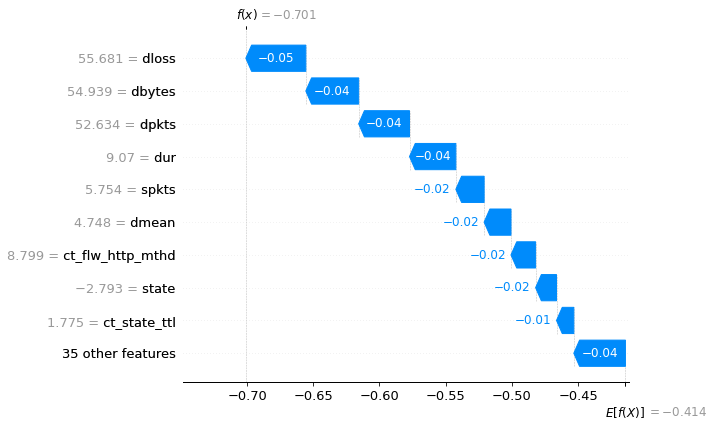

In [25]:
import shap
shap.plots.waterfall(obj2.shap_values[0])